# Two Layer QG Model Example #

Here is a quick overview of how to use the two-layer model. See the
:py:class:`pyqg.QGModel` api documentation for further details.

First import numpy, matplotlib, and pyqg:

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import pyqg

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 23 days
Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 23 days
Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 23 days


## Initialize and Run the Model ##

Here we set up a model which will run for 10 years and start averaging
after 5 years. There are lots of parameters that can be specified as
keyword arguments but we are just using the defaults.

In [2]:
year = 24*60*60*360.
m = pyqg.QGModel(tmax=10*year, twrite=10000, tavestart=5*year)
m.run()

2015-10-18 19:30:23,046 - pyqg.model - INFO -  Logger initialized
INFO:pyqg.model: Logger initialized
2015-10-18 19:30:23,117 - pyqg.model - INFO -  Kernel initialized
INFO:pyqg.model: Kernel initialized
2015-10-18 19:30:33,186 - pyqg.model - INFO -  Step: 10000, Time: 7.200000e+07, KE: 3.614993e-04, CFL: 0.086219
INFO:pyqg.model: Step: 10000, Time: 7.200000e+07, KE: 3.614993e-04, CFL: 0.086219
2015-10-18 19:30:43,967 - pyqg.model - INFO -  Step: 20000, Time: 1.440000e+08, KE: 4.750430e-04, CFL: 0.092238
INFO:pyqg.model: Step: 20000, Time: 1.440000e+08, KE: 4.750430e-04, CFL: 0.092238
2015-10-18 19:30:53,848 - pyqg.model - INFO -  Step: 30000, Time: 2.160000e+08, KE: 4.923666e-04, CFL: 0.099416
INFO:pyqg.model: Step: 30000, Time: 2.160000e+08, KE: 4.923666e-04, CFL: 0.099416
2015-10-18 19:31:03,669 - pyqg.model - INFO -  Step: 40000, Time: 2.880000e+08, KE: 5.413852e-04, CFL: 0.101265
INFO:pyqg.model: Step: 40000, Time: 2.880000e+08, KE: 5.413852e-04, CFL: 0.101265


## Visualize Output ##


We access the actual pv values through the attribute ``m.q``. The first axis
of ``q`` corresponds with the layer number. (Remeber that in python, numbering
starts at 0.)

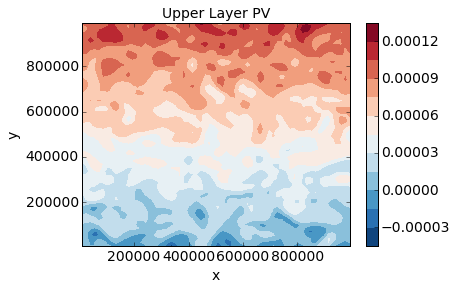

In [3]:
q_upper = m.q[0] + m.Qy[0]*m.y
plt.contourf(m.x, m.y, q_upper, 12, cmap='RdBu_r')
plt.xlabel('x'); plt.ylabel('y'); plt.title('Upper Layer PV')
plt.colorbar();

## Plot Diagnostics ##

The model automatically accumulates averages of certain diagnostics. We can 
find out what diagnostics are available by calling

In [4]:
m.describe_diagnostics()

NAME       | DESCRIPTION
--------------------------------------------------------------------------------
APEflux    | spectral flux of available potential energy           
APEgen     | total APE generation                                  
APEgenspec | spectrum of APE generation                            
EKE        | mean eddy kinetic energy                              
EKEdiss    | total energy dissipation by bottom drag               
Ensspec    | enstrophy spectrum                                    
KEflux     | spectral flux of kinetic energy                       
KEspec     |  kinetic energy spectrum                              
entspec    | barotropic enstrophy spectrum                         
q          | QGPV                                                  
u          | zonal velocity                                        
v          | meridional velocity                                   
vq         | meridional PV flux                                    


To look at the wavenumber energy spectrum, we plot the `KEspec` diagnostic.
(Note that summing along the l-axis, as in this example, does not give us
a true *isotropic* wavenumber spectrum.)

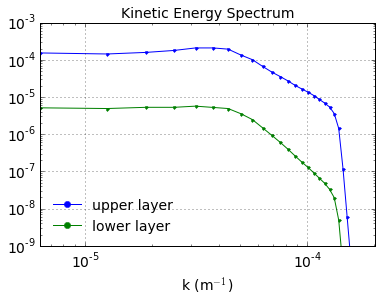

In [5]:
kespec_u = m.get_diagnostic('KEspec')[0].sum(axis=0)
kespec_l = m.get_diagnostic('KEspec')[1].sum(axis=0)
plt.loglog( m.kk, kespec_u, '.-' )
plt.loglog( m.kk, kespec_l, '.-' )
plt.legend(['upper layer','lower layer'], loc='lower left')
plt.ylim([1e-9,1e-3]); plt.xlim([m.kk.min(), m.kk.max()])
plt.xlabel(r'k (m$^{-1}$)'); plt.grid()
plt.title('Kinetic Energy Spectrum');

We can also plot the spectral fluxes of energy.

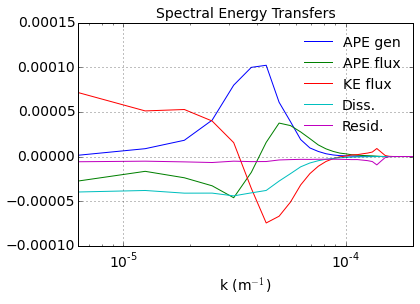

In [6]:
ebud = [ -m.get_diagnostic('APEgenspec').sum(axis=0),
         -m.get_diagnostic('APEflux').sum(axis=0),
         -m.get_diagnostic('KEflux').sum(axis=0),
         -m.rek*m.del2*m.get_diagnostic('KEspec')[1].sum(axis=0)*m.M**2 ]
ebud.append(-np.vstack(ebud).sum(axis=0))
ebud_labels = ['APE gen','APE flux','KE flux','Diss.','Resid.']
[plt.semilogx(m.kk, term) for term in ebud]
plt.legend(ebud_labels, loc='upper right')
plt.xlim([m.kk.min(), m.kk.max()])
plt.xlabel(r'k (m$^{-1}$)'); plt.grid()
plt.title('Spectral Energy Transfers');

In [7]:
m.U

0.025

In [8]:
m.dt

7200.0